In [ ]:
!pip install openpyxl
!pip install -U sentence-transformers

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from numba import jit, cuda
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics.cluster import v_measure_score, homogeneity_score, completeness_score
import sys

from tqdm import tqdm
tqdm.pandas()

from sentence_transformers import SentenceTransformer

In [4]:
# datasets = [] 
data_1 = pd.read_excel("data/PBS/May/ETL_PIMData4AIModel_Artikelbeschreibung_20230507.xlsx")
data_2 = pd.read_excel("data/PBS/2023-05-15/ETL_PIMData4AIModel_Artikelbeschreibung_20230507.xlsx")
data_3 = pd.read_excel("data/PBS/2023-05-24/ETL_PIMData4AIModel_Artikelbeschreibung_20230507.xlsx")
data_4 = pd.read_excel("data/PBS/2023-05-25/ETL_PIMData4AIModel_Artikelbeschreibung_20230507.xlsx")
data_5 = pd.read_excel("data/PBS/2023-05-29/ETL_PIMData4AIModel_Artikelbeschreibung_20230507.xlsx")
# data_6 = pd.read_excel("data/PBS/2023-05-31/ETL_PIMData4AIModel_Artikelbeschreibung_20230507.xlsx")
# data_7 = pd.read_excel("data/PBS/2023-06-06/ETL_PIMData4AIModel_Artikelbeschreibung_20230525.xlsx")
# data_8 = pd.read_excel("data/PBS/2023-07-17/ETL_PIMData4AIModel_Artikelbeschreibung_20230525.xlsx")
# data_9 = pd.read_excel("data/PBS/2023-08-16/ETL_PIMData4AIModel_Artikelbeschreibung_2023-08-16.xlsx")
data_10 = pd.read_excel("data/PBS/2023-11-03/ETL_PIMData4AIModel_Artikelbeschreibung_2023-11-03.xlsx")

eclass_namen = pd.read_excel("data/PBS/eClass8.1_Namen.xlsx")

# dumps 6, 7, 8, 9, eclass grouped named for each layer, preprocessed in the data_analysis.ipynb
data_6 = pd.read_excel("data/PBS/2023-05-31/data_6.xlsx")
data_7 = pd.read_excel("data/PBS/2023-06-06/data_7.xlsx")
data_8 = pd.read_excel("data/PBS/2023-07-17/data_8.xlsx")
data_9 = pd.read_excel("data/PBS/2023-08-16/data_9.xlsx")

/home/jovyan/my-conda-envs/myenv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/jovyan/my-conda-envs/myenv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/jovyan/my-conda-envs/myenv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/jovyan/my-conda-envs/myenv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/home/jovyan/my-conda-envs/myenv

In [4]:
data_1.columns

Index(['Konzernartikelnummer', 'ECLASS_8_1', 'ECLASS_Name', 'Bezeichnung',
       'Webbezeichnung', 'Detailinformation', 'LieferantenDetailinformation',
       'OEMNummer', 'Hersteller', 'Marke'],
      dtype='object')

In [5]:
data_2.columns

Index(['Konzernartikelnummer', 'ECLASS_8_1', 'ECLASS_Name', 'Bezeichnung',
       'Webbezeichnung', 'Detailinformation', 'LieferantenDetailinformation',
       'OEMNummer', 'Hersteller', 'Marke'],
      dtype='object')

In [6]:
data_3.columns

Index(['Konzernartikelnummer', 'ECLASS_8_1', 'ECLASS_Name', 'Bezeichnung',
       'Webbezeichnung', 'Detailinformation', 'LieferantenDetailinformation',
       'OEMNummer', 'Hersteller', 'Marke'],
      dtype='object')

In [7]:
data_4.columns

Index(['Konzernartikelnummer', 'ECLASS_8_1', 'ECLASS_Name', 'Bezeichnung',
       'Webbezeichnung', 'Detailinformation', 'LieferantenDetailinformation',
       'OEMNummer', 'Hersteller', 'Marke'],
      dtype='object')

In [8]:
data_5.columns

Index(['Konzernartikelnummer', 'ECLASS_8_1', 'ECLASS_Name', 'Bezeichnung',
       'Webbezeichnung', 'Detailinformation', 'LieferantenDetailinformation',
       'OEMNummer', 'Hersteller', 'Marke'],
      dtype='object')

In [9]:
data_6.columns

Index(['Unnamed: 0', 'Konzernartikelnummer', 'ECLASS_8_1', 'ECLASS_Name',
       'Bezeichnung', 'Webbezeichnung', 'Detailinformation',
       'LieferantenDetailinformation', 'OEMNummer', 'Hersteller', 'Marke',
       'layer_1', 'layer_2', 'layer_3', 'layer_4', 'group_name_layer_1',
       'group_name_layer_2', 'group_name_layer_3', 'group_name_layer_4'],
      dtype='object')

In [10]:
data_7.columns

Index(['Unnamed: 0', 'Konzernartikelnummer', 'ECLASS_8_1', 'ECLASS_Name',
       'Text', 'Hersteller', 'Marke', 'layer_1', 'layer_2', 'layer_3',
       'layer_4', 'group_name_layer_1', 'group_name_layer_2',
       'group_name_layer_3', 'group_name_layer_4'],
      dtype='object')

In [11]:
data_8.columns

Index(['Unnamed: 0', 'Konzernartikelnummer', 'ECLASS_8_1', 'ECLASS_Name',
       'Text', 'Hersteller', 'Marke', 'layer_1', 'layer_2', 'layer_3',
       'layer_4', 'group_name_layer_1', 'group_name_layer_2',
       'group_name_layer_3', 'group_name_layer_4'],
      dtype='object')

In [12]:
data_9.columns

Index(['Unnamed: 0', 'Konzernartikelnummer', 'ECLASS_8_1', 'ECLASS_Name',
       'Text', 'Hersteller', 'Marke', 'layer_1', 'layer_2', 'layer_3',
       'layer_4', 'group_name_layer_1', 'group_name_layer_2',
       'group_name_layer_3', 'group_name_layer_4'],
      dtype='object')

In [13]:
data_10.columns

Index(['Konzernartikelnummer', 'ECLASS_8_1', 'ECLASS_Name', 'Text',
       'Hersteller', 'Marke'],
      dtype='object')

In [5]:
def remove_unpopular_products(data):
    ## remove products with a count of less than 10

    # choose certain columns, sort by ECLASS
    df = pd.DataFrame(data[['Konzernartikelnummer', 'ECLASS_8_1']])
    sorted_df = df.sort_values('ECLASS_8_1')
    sorted_df.reset_index(inplace=True)
    sorted_df.drop(columns=['index'], inplace=True)
    
    # set a class count for all the products
    copied_sorted_df = sorted_df.copy()

    copied_sorted_df['class_count'] = 1
    copied_sorted_df['ECLASS_8_1'] = copied_sorted_df['ECLASS_8_1'].map(str)
    # print(type(copied_sorted_df['ECLASS_8_1'][0]))

    # aggregates the rows and sums the product class numbers to extract their count}
    summed_leaves = copied_sorted_df.groupby(by='ECLASS_8_1').agg(sum)
    summed_leaves.reset_index(inplace=True)
    # extracts and splits the ECLASS_8_1 values, into the first two, first 4, first 6, and first 8 (all) digits. "i" is the layer (first i) numbers
    # applies the function on all the rows of the dataset
    for i in range(1,5): 
        layername = "layer_"+str(i)
        summed_leaves[layername] = summed_leaves['ECLASS_8_1'].apply(func=lambda x, i: x[0: i*2], args=(i,))
    # zero_layer to act as the root node 
    summed_leaves['layer_0'] = 0

    # remove the products with a class count of less than 10

    summed_leaves['ECLASS_8_1'] = summed_leaves['ECLASS_8_1'].astype('int')
    # below_threshold_indices = summed_leaves.loc[summed_leaves.class_count<10].ECLASS_8_1
    # data = data[~data.ECLASS_8_1.isin(list(below_threshold_indices))]
    
    # print(summed_leaves.columns)
    
    summed_leaves2 = summed_leaves.loc[summed_leaves.class_count>9]
    summed_leaves2 = summed_leaves2.drop(['layer_0', 'Konzernartikelnummer', 'layer_1', 'layer_2', 'layer_3', 'layer_4'], axis=1)

    # print(summed_leaves2.columns)
    descr_data_layered = pd.merge(data, summed_leaves2, on='ECLASS_8_1', how='left')
    
    return descr_data_layered

# def combine_data_with_names(data):    
#     eclass_namen2 = eclass_namen.rename({'eClassIdentifier': 'ECLASS_8_1'}, axis=1, inplace=False)
#     categories = pd.merge(data, eclass_namen2, on='ECLASS_8_1', how='left')
#     print(categories.columns)
#     return categories



In [4]:
result = remove_unpopular_products(data_6)

/tmp/ipykernel_193/1239361435.py:18: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summed_leaves = copied_sorted_df.groupby(by='ECLASS_8_1').agg(sum)


In [6]:
# save all the data

data_list = [data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9, data_10]

df_list = []

for data in data_list: 
    result = remove_unpopular_products(data)
    df_list.append(result)


# named_data_list = []
# for data in df_list:
#     named_data_list.append(combine_data_with_names(data))
    
# named_data_list

/tmp/ipykernel_132/1239361435.py:18: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summed_leaves = copied_sorted_df.groupby(by='ECLASS_8_1').agg(sum)
/tmp/ipykernel_132/1239361435.py:18: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summed_leaves = copied_sorted_df.groupby(by='ECLASS_8_1').agg(sum)
/tmp/ipykernel_132/1239361435.py:18: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summed_leaves = copied_sorted_df.groupby(by='EC

In [7]:
data_1_set = set(df_list[0].Konzernartikelnummer.unique())
data_2_set = set(df_list[1].Konzernartikelnummer.unique())
data_3_set = set(df_list[2].Konzernartikelnummer.unique())
data_4_set = set(df_list[3].Konzernartikelnummer.unique())
data_5_set = set(df_list[4].Konzernartikelnummer.unique())
data_6_set = set(df_list[5].Konzernartikelnummer.unique())
data_7_set = set(df_list[6].Konzernartikelnummer.unique())
data_8_set = set(df_list[7].Konzernartikelnummer.unique())
data_9_set = set(df_list[8].Konzernartikelnummer.unique())
data_10_set = set(df_list[9].Konzernartikelnummer.unique())
# print(len(data_1.Konzernartikelnummer.unique()))
# data_1.Konzernartikelnummer.unique()

In [8]:
print("1 & 2")
print(data_1_set - data_2_set)
print(data_2_set - data_1_set)
print("2 & 3")
print(data_3_set - data_2_set)
print(data_2_set - data_3_set)
print("3 & 4")
print(data_3_set - data_4_set)
print(data_4_set - data_3_set)
print("4 & 5")
print(data_4_set - data_5_set)
print(data_5_set - data_4_set)
print("5 & 6")
print(data_5_set - data_6_set)
print(data_6_set - data_5_set)
print("6 & 7")
print(data_6_set - data_7_set)
print(data_7_set - data_6_set)
print(len(data_6_set - data_7_set))
print(len(data_7_set - data_6_set))
print("7 & 8")
print(data_7_set - data_8_set)
print(data_8_set - data_7_set)
print("8 & 9")
print(data_8_set - data_9_set)
print(data_9_set - data_8_set)
print(len(data_8_set - data_9_set))
print(len(data_9_set - data_8_set))
print("9 & 10")
print(data_9_set - data_10_set)
print(data_10_set - data_9_set)

1 & 2
set()
set()
2 & 3
set()
set()
3 & 4
set()
set()
4 & 5
set()
set()
5 & 6
set()
set()
6 & 7
{1000341617, 1000341621, 1000341624, 1000341626, 1000473053, 1000473079, 1000080022, 3000238968, 1000473584, 1000473585, 1000342593, 1000473707, 1000473708, 1000473769, 1000473955, 3000370599, 3000371130, 3000240337, 3000240338, 3000240345, 3000240346, 3000502603, 3000502604, 3000502605, 3000502606, 3000502607, 3000502608, 3000502745, 1000213055, 1000213056, 1000213057, 1000213058, 3000502851, 3000502852, 3000502853, 3000502854, 3000502855, 3000502856, 1000213059, 1000213060, 1000213061, 1000475247, 1000475248, 1000475249, 1000213218, 1000213220, 1000213275, 1000213277, 1000475424, 1000475430, 1000344483, 3000503229, 3000503288, 3000503289, 3000503290, 3000503291, 3000503292, 3000503293, 3000503294, 3000503297, 3000503298, 3000503299, 3000503300, 3000503302, 3000503303, 3000503429, 3000503430, 3000503431, 3000503432, 3000503433, 3000503434, 3000503435, 3000503436, 3000503437, 1000213669, 300

Plot the differences

### Find removed products from each consecutive dump 

In [9]:

diff_67 = data_6_set - data_7_set
diff_76 = data_7_set - data_6_set
diff_89 = data_8_set - data_9_set
diff_98 =  data_9_set - data_8_set

df_list
df_diff_67 = df_list[5][df_list[5].Konzernartikelnummer.isin(list(diff_67))]
df_diff_76 = df_list[6][df_list[6].Konzernartikelnummer.isin(list(diff_76))]
df_diff_89 = df_list[7][df_list[7].Konzernartikelnummer.isin(list(diff_89))]
df_diff_98 = df_list[8][df_list[8].Konzernartikelnummer.isin(list(diff_98))]
# Extract the removed product IDs
# df_diff_67 = named_data_list[5][named_data_list[5].Konzernartikelnummer.isin(list(diff_67))]
# df_diff_76 = named_data_list[6][named_data_list[6].Konzernartikelnummer.isin(list(diff_76))]
# df_diff_89 = named_data_list[7][named_data_list[7].Konzernartikelnummer.isin(list(diff_89))]
# df_diff_98 = named_data_list[8][named_data_list[8].Konzernartikelnummer.isin(list(diff_98))]


In [15]:
# df_diff_67 = df_diff_67.drop(['class_count'], axis=1, inplace=False)
# # df_diff_67.groupby('layer_1')

# df_diff_767 = df_diff_76[['ECLASS_8_1', 'Konzernartikelnummer', 'layer_1', 'layer_2', 'layer_3', 'layer_4']]
# 'Konzernartikelnummer',
# df_diff_89 = df_diff_89[['ECLASS_8_1', 'Konzernartikelnummer','layer_1', 'layer_2', 'layer_3', 'layer_4']]
# df_diff_98 = df_diff_98[['ECLASS_8_1', 'Konzernartikelnummer','layer_1', 'layer_2', 'layer_3', 'layer_4']]



# merged_67 = pd.merge(df_diff_676, df_diff_67, on=["ECLASS_8_1"])
# merged_67

/tmp/ipykernel_1386/1344426443.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff_676.loc[:, 'count_1'] = 1


### Dump 6
The products in the dump 6 but removed in the dump 7

In [10]:
diff_67_copy = df_diff_67[['ECLASS_8_1', 'Konzernartikelnummer', 'layer_1', 'layer_2', 'layer_3', 'layer_4']].copy()

#### layer 1

In [11]:
diff_67_copy.loc[:, 'count_1'] = 1
dump6_L1 = diff_67_copy.groupby(by = ['layer_1']).sum()
dump6_L1.reset_index(inplace=True)
dump6_L1.sort_values(by='count_1', ascending=False, inplace=True)
dump6_L1 = dump6_L1[['layer_1', 'count_1']]

merged_dump_67_l1 = pd.merge(dump6_L1, df_diff_67[['layer_1', 'group_name_layer_1']], on="layer_1", how="left")
merged_dump_67_l1 = merged_dump_67_l1.drop_duplicates(subset=['layer_1']).reset_index().drop('index', axis=1)
merged_dump_67_l1

,layer_1,count_1,group_name_layer_1
0,24000000,16906,"Office product, facility and technic, papeterie"
1,19000000,2481,"Information, communication and media technology"
2,40000000,2002,"Occupational safety, accident prevention"
3,29000000,1888,"Home economics, Home technology"
4,41000000,979,Marketing
5,30000000,507,"Auxiliary supply, additive, cleaning agent"
6,16000000,471,"Food, beverage, tobacco"
7,20000000,421,Packing material
8,27000000,383,"Electric engineering, automation, process cont..."
9,23000000,298,"Machine element, fixing, mounting"


In [17]:
list(merged_dump_67_l1[:10].count_1)
sum(list(merged_dump_67_l1.count_1))

26685

#### layer 2

In [12]:
diff_67_copy.loc[:, 'count_2'] = 1
dump6_L2 = diff_67_copy.groupby(by = ['layer_2']).sum()
dump6_L2.reset_index(inplace=True)
dump6_L2.sort_values(by='count_2', ascending=False, inplace=True)
dump6_L2 = dump6_L2[['layer_2', 'count_2']]
dump6_L2

merged_dump = pd.merge(dump6_L2, df_diff_67[['layer_2', 'group_name_layer_2']], on="layer_2", how="left")
merged_dump.drop_duplicates(subset=['layer_2']).reset_index().drop('index', axis=1)

,layer_2,count_2,group_name_layer_2
0,24310000,3658,Office furnishing
1,24290000,2491,"Filing system, storage system"
2,19140000,1882,Output device for computer
3,24340000,1768,"Fancy goods, gift, party article"
4,24260000,1539,"Paper, foil, packing material (office)"
...,...,...,...
121,34210000,1,Wound care
122,34200000,1,Immobilization therapy supplies
123,20160000,1,Sack (packing material)
124,20180000,1,Shell (packing material)


#### layer 3

In [13]:
diff_67_copy.loc[:, 'count_3'] = 1
dump6_L3 = diff_67_copy.groupby(by = ['layer_3']).sum()
dump6_L3.reset_index(inplace=True)
dump6_L3.sort_values(by='count_3', ascending=False, inplace=True)
dump6_L3 = dump6_L3[['layer_3', 'count_3']]
dump6_L3

merged_dump = pd.merge(dump6_L3, df_diff_67[['layer_3', 'group_name_layer_3']], on="layer_3", how="left")
merged_dump.drop_duplicates(subset=['layer_3']).reset_index().drop('index', axis=1)

,layer_3,count_3,group_name_layer_3
0,19140600,1799,"Ink, toner, fixer, developer for computer outp..."
1,24311100,1632,Chairs (office equipment)
2,24310700,1563,"Cabinet, shelf (office equipment)"
3,24221000,799,Office stamp
4,24330100,589,"School-, preschool accessory"
...,...,...,...
399,24389200,1,Safety system and safety device (accessories)
400,34210400,1,Wound dressing
401,34200300,1,Padding material (medicine)
402,25131700,1,"Commercial kitchen equipment, household applia..."


#### layer 4

In [14]:
diff_67_copy.loc[:, 'count_4'] = 1
dump6_L4 = diff_67_copy.groupby(by = ['layer_4']).sum()
dump6_L4.reset_index(inplace=True)
dump6_L4.sort_values(by='count_4', ascending=False, inplace=True)
dump6_L4 = dump6_L4[['layer_4', 'count_4']]
dump6_L4

merged_dump = pd.merge(dump6_L4, df_diff_67[['layer_4', 'group_name_layer_4']], on="layer_4", how="left")
merged_dump.drop_duplicates(subset=['layer_4']).reset_index().drop('index', axis=1)

,layer_4,count_4,group_name_layer_4
0,24310705,1269,Drawer cabinet
1,24311101,1152,"Swivel office chair, swivel office armchair"
2,19140601,1029,"Toner, toner unit (laser printer, copier)"
3,19140605,566,"Inkjet cartridge, print head (inkjet printer)"
4,29039090,482,"Household appliance (manual, other, unspecified)"
...,...,...,...
898,24321306,1,Thermal binding cover
899,24210207,1,Multimedia storage
900,24210690,1,"Cable fastener (office, unspecified)"
901,24321105,1,Embossing tape


Finding which products were there in may (31st) and not in June

In [15]:
def differences(data, df_setA, df_setB):
    removed = data[data.Konzernartikelnummer.isin(list(data_6_set - data_7_set))]
    # removed_layers = removed.loc[:, ['layer_1', 'layer_2', 'layer_3', 'layer_4', 'ECLASS_8_1', 'ECLASS_Name']].copy()
    removed_layers = removed.loc[:, ['ECLASS_8_1', 'ECLASS_Name']].copy()

    removed_layers['count'] = 1
    # grouped = removed_layers.groupby(['layer_1', 'ECLASS_Name'])['count'].sum()
    e_class = removed_layers.groupby(['ECLASS_8_1'])['count'].sum()
    
    return e_class

# group by layers to know which layer was mostly removed 

Result of the cell below:

result => dataframe with zero rows on an inner join of the two differences 
-> there's no common category that was changed (removed or added) between the change from May to June, and July to August


In [19]:
diff_67 = pd.DataFrame(differences(df_list[5].copy(), data_6_set, data_7_set)).reset_index('ECLASS_8_1')
diff_76 = pd.DataFrame(differences(df_list[6].copy(), data_7_set, data_6_set)).reset_index('ECLASS_8_1')

diff_89 = pd.DataFrame(differences(df_list[7].copy(), data_8_set, data_9_set)).reset_index('ECLASS_8_1')
diff_98 = pd.DataFrame(differences(df_list[8].copy(), data_9_set, data_8_set)).reset_index('ECLASS_8_1')
# print(diff_67)
# print(len(diff_67))
# print(len(diff_76))
# print(len(diff_89))
# print(len(diff_98))

# 100 top changes for product categories
# diff_67.nlargest(10)

merged_removed_prod_categories = pd.concat([diff_67, diff_98], axis=1, join='inner')
merged_removed_prod_categories
# result => dataframe with zero rows on an inner join of the two differences 
# -> there's no common category that was changed (removed or added) between the change from May to June, and July to August


,ECLASS_8_1,count,ECLASS_8_1,count
0,14029090,10,14029090,10
1,15309090,2,15309090,2
2,16030190,1,16030190,1
3,16030290,207,16030290,207
4,16039090,3,16039090,3
...,...,...,...,...
897,41091202,12,41091302,2
898,41091302,2,41100190,1
899,41100190,1,41100201,3
900,41100201,3,41120308,25


=> append the two dataframes together and apply max aggregation to find the number of most categories changed

In [84]:
diff_98.head(2)

ECLASS_8_1
14029090     13
16030290    207
Name: count, dtype: int64

In [95]:
# diff_67.append(diff_98)
pd.concat([diff_67, diff_98], ignore_index=True).nlargest(10, columns='count')

,ECLASS_8_1,count
1041,24310705,1291
371,24310705,1274
374,24311101,1152
1044,24311101,1152
37,19140601,1029
709,19140601,1022
40,19140605,566
712,19140605,564
544,29039090,489
1214,29039090,489


In [ ]:
columns = ['reduced_prod', 'product_count', 'added_prod']
dumps = pd.DataFrame(columns=columns)

for df in df_list:
    dumps.append(df_list[])

### Dump 7
products added to dump 6

In [16]:
diff_76_copy = df_diff_76[['ECLASS_8_1', 'Konzernartikelnummer', 'layer_1', 'layer_2', 'layer_3', 'layer_4']].copy()

In [17]:
diff_76_copy.loc[:, 'count_1'] = 1
dump7_L1 = diff_76_copy.groupby(by = ['layer_1']).sum()
dump7_L1.reset_index(inplace=True)
dump7_L1.sort_values(by='count_1', ascending=False, inplace=True)
dump7_L1 = dump7_L1[['layer_1', 'count_1']]

merged_dump_76_l1 = pd.merge(dump7_L1, df_diff_76[['layer_1', 'group_name_layer_1']], on="layer_1", how="left")
merged_dump_76_l1 = merged_dump_76_l1.drop_duplicates(subset=['layer_1']).reset_index().drop('index', axis=1)
merged_dump_76_l1

,layer_1,count_1,group_name_layer_1
0,24000000,432,"Office product, facility and technic, papeterie"
1,19000000,75,"Information, communication and media technology"
2,29000000,18,"Home economics, Home technology"
3,30000000,14,"Auxiliary supply, additive, cleaning agent"
4,23000000,3,"Machine element, fixing, mounting"
5,27000000,3,"Electric engineering, automation, process cont..."
6,40000000,2,"Occupational safety, accident prevention"
7,14000000,1,Logistics (Service)
8,16000000,1,"Food, beverage, tobacco"
9,25000000,1,General service


### Dump 8
products removed form dump 8 to 9 

In [18]:
diff_89_copy = df_diff_89[['ECLASS_8_1', 'Konzernartikelnummer', 'layer_1', 'layer_2', 'layer_3', 'layer_4']].copy()

#### layer 1

In [19]:
diff_89_copy.loc[:, 'count_1'] = 1
dump8_L1 = diff_89_copy.groupby(by = ['layer_1']).sum()
dump8_L1.reset_index(inplace=True)
dump8_L1.sort_values(by='count_1', ascending=False, inplace=True)
dump8_L1 = dump8_L1[['layer_1', 'count_1']]

merged_dump_89_l1 = pd.merge(dump8_L1, df_diff_89[['layer_1', 'group_name_layer_1']], on="layer_1", how="left")
merged_dump_89_l1 = merged_dump_89_l1.drop_duplicates(subset=['layer_1']).reset_index().drop('index', axis=1)
merged_dump_89_l1

,layer_1,count_1,group_name_layer_1
0,24000000,6,"Office product, facility and technic, papeterie"


### Dump 9
products added to dump 8 from dump 9

In [20]:
diff_98_copy = df_diff_98[['ECLASS_8_1', 'Konzernartikelnummer', 'layer_1', 'layer_2', 'layer_3', 'layer_4']].copy()

In [21]:
diff_98_copy.loc[:, 'count_1'] = 1
dump9_L1 = diff_98_copy.groupby(by = ['layer_1']).sum()
dump9_L1.reset_index(inplace=True)
dump9_L1.sort_values(by='count_1', ascending=False, inplace=True)
dump9_L1 = dump9_L1[['layer_1', 'count_1']]

merged_dump_98_l1 = pd.merge(dump9_L1, df_diff_98[['layer_1', 'group_name_layer_1']], on="layer_1", how="left")
merged_dump_98_l1 = merged_dump_98_l1.drop_duplicates(subset=['layer_1']).reset_index().drop('index', axis=1)
merged_dump_98_l1

,layer_1,count_1,group_name_layer_1
0,24000000,25057,"Office product, facility and technic, papeterie"
1,19000000,3018,"Information, communication and media technology"
2,29000000,2521,"Home economics, Home technology"
3,40000000,2239,"Occupational safety, accident prevention"
4,41000000,1037,Marketing
5,30000000,642,"Auxiliary supply, additive, cleaning agent"
6,20000000,640,Packing material
7,16000000,591,"Food, beverage, tobacco"
8,23000000,550,"Machine element, fixing, mounting"
9,27000000,540,"Electric engineering, automation, process cont..."


### Plots
The fluctuations of the products through different dumps of data

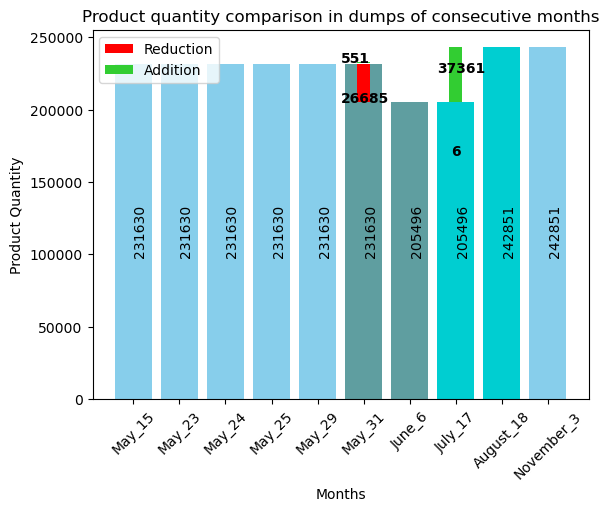

In [22]:
import matplotlib.pyplot as plt


diff_12 = len(data_1_set - data_2_set)
diff_21 = len(data_2_set - data_1_set)

diff_23 = len(data_2_set - data_3_set)
diff_32 = len(data_3_set - data_2_set)

diff_34 = len(data_3_set - data_4_set)
diff_43 = len(data_4_set - data_3_set)

diff_45 = len(data_4_set - data_5_set)
diff_54 = len(data_5_set - data_4_set)

diff_56 = len(data_5_set - data_6_set)
diff_65 = len(data_6_set - data_5_set)

diff_67 = len(data_6_set - data_7_set)
diff_76 = len(data_7_set - data_6_set)

diff_78 = len(data_7_set - data_8_set)
diff_87 = len(data_8_set - data_7_set)

diff_89 = len(data_8_set - data_9_set)
diff_98 = len(data_9_set - data_8_set)

diff_9_10 = len(data_9_set - data_10_set)
diff_10_9 = len(data_10_set - data_9_set)

# Create a bar plot
fig, ax = plt.subplots()

# Plot the total number of products for each month
ax.text(0, 100000, s=f"{len(data_1_set)}", rotation='vertical')
ax.bar('May_15', len(data_1_set), color='skyblue')

ax.text(1, 100000, s=f"{len(data_2_set)}", rotation='vertical')
ax.bar('May_23', len(data_2_set), color='skyblue')

ax.text(2, 100000, s=f"{len(data_3_set)}", rotation='vertical')
ax.bar('May_24', len(data_3_set), color='skyblue')

ax.text(3, 100000, s=f"{len(data_4_set)}", rotation='vertical')
ax.bar('May_25', len(data_4_set), color='skyblue')

ax.text(4, 100000, s=f"{len(data_5_set)}", rotation='vertical')
ax.bar('May_29', len(data_5_set), color='skyblue')

ax.text(5, 100000, s=f"{len(data_6_set)}", rotation='vertical')
ax.bar('May_31', len(data_6_set), color='cadetblue')

ax.text(6, 100000, s=f"{len(data_7_set)}", rotation='vertical')
ax.bar('June_6', len(data_7_set), color='cadetblue')

ax.text(7, 100000, s=f"{len(data_8_set)}", rotation='vertical')
ax.bar('July_17', len(data_8_set), color='darkturquoise')

ax.text(8, 100000, s=f"{len(data_9_set)}", rotation='vertical')
ax.bar('August_18', len(data_9_set), color='darkturquoise')

ax.text(9, 100000, s=f"{len(data_10_set)}", rotation='vertical')
ax.bar('November_3', len(data_10_set), color='skyblue')


# Plot the added and removed products on the same bars
ax.bar('May_31', diff_67, bottom=len(data_6_set)-diff_67, label="Reduction", color='red', width=0.3)
ax.bar('May_31', diff_76, bottom=diff_76 + len(data_6_set), label="Addition", color='limegreen', width=0.3)
ax.text(x=4.5, y=len(data_6_set)-diff_67, s=f"{diff_67}", rotation='horizontal', fontweight='bold')
ax.text(x=4.5, y=diff_76 + len(data_6_set), s=f"{diff_76}", rotation='horizontal', fontweight='bold')

ax.bar('July_17', diff_89, bottom=len(data_8_set)-diff_89, color='red', width=1)
ax.bar('July_17', diff_98, bottom=len(data_8_set),  color='limegreen', width=0.3)
ax.text(x=6.6, y=len(data_8_set)-diff_89+20000, s=f"{diff_98}", rotation='horizontal', fontweight='bold')
ax.text(x=6.9, y=len(data_8_set)-diff_98 + 500, s=f"{diff_89}", rotation='horizontal', fontweight='bold')


# Add labels and legend
ax.set_xlabel('Months')
ax.set_ylabel('Product Quantity')
ax.set_title('Product quantity comparison in dumps of consecutive months')
ax.legend(loc='upper left')

plt.xticks(rotation=45)

# plt.text(0, 0.5, f"Number of values: {len(data)}")

# Display the plot
plt.show()


#### pie plot

##### Products removed

([<matplotlib.patches.Wedge at 0x7ff1d8ed38e0>,
 [Text(-0.448060883974448, 1.0046100956351358, 'Office product, facility and technic, papeterie'),
  Text(-0.46819318270892496, -0.9953869316325624, 'Information, communication and media technology'),
  Text(0.09680658099263087, -1.095731940702888, 'Occupational safety, accident prevention'),
  Text(0.5712801257795328, -0.9400207539673373, 'Home economics, Home technology'),
  Text(0.8503397394041612, -0.6977981997612658, 'Marketing'),
  Text(0.9588147901517124, -0.5391420946154436, 'Auxiliary supply, additive, cleaning agent'),
  Text(1.0144054211732232, -0.42541937132008434, 'Food, beverage, tobacco'),
  Text(1.0534101055355916, -0.3167446125121849, 'Packing material'),
  Text(1.0786310605191356, -0.21576615880013472, 'Electric engineering, automation, process control engineering'),
  Text(1.0924464866240253, -0.12868828176187402, 'Machine element, fixing, mounting'),
  Text(1.099071637310878, -0.04518336041936216, 'other')],
 [Text(-0.

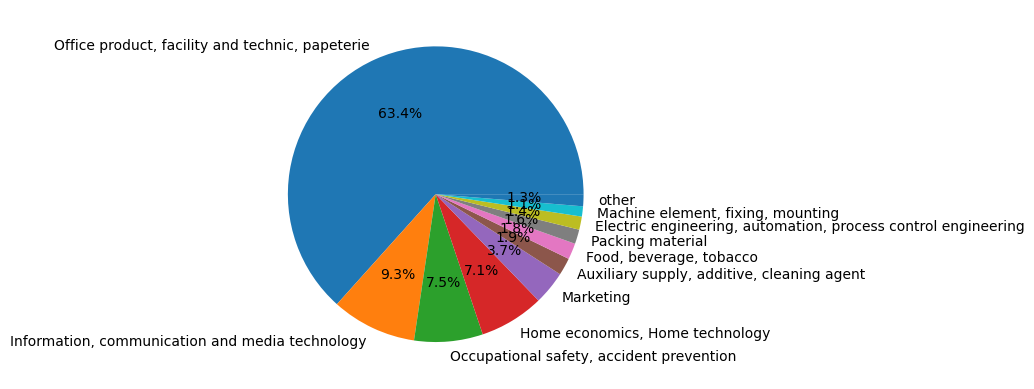

In [23]:
labels = list(merged_dump_67_l1[:10].group_name_layer_1)+ ["other"]
sizes = list(merged_dump_67_l1[:10].count_1) + [sum(list(merged_dump_67_l1[10:].count_1))]
fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct= '%1.1f%%')
# ax.set_title('Products removed from May to June, Layer 1', pad=10)

Products removed from dump 8 to 9 

([<matplotlib.patches.Wedge at 0x7ff1d8de4b50>,
 [Text(-1.1, 1.3471114790620887e-16, 'Office product, facility and technic, papeterie'),
  Text(1.1, -2.6942229581241775e-16, 'other')],
 [Text(-0.6, 7.347880794884119e-17, '100.0%'),
  Text(0.6, -1.4695761589768238e-16, '0.0%')])

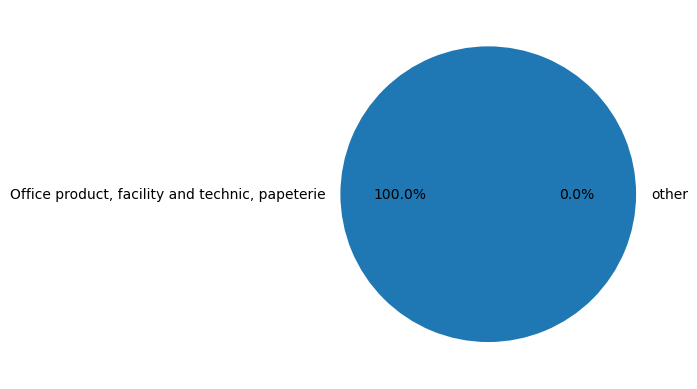

In [24]:
labels = list(merged_dump_89_l1[:10].group_name_layer_1)+ ["other"]
sizes = list(merged_dump_89_l1[:10].count_1) + [sum(list(merged_dump_89_l1[10:].count_1))]
fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct= '%1.1f%%')
# ax.set_title('Products removed from July to August, Layer 1', pad=10)

##### Products added

products added to dump 7 to dump 6

([<matplotlib.patches.Wedge at 0x7ff1d8dfb8e0>,
 [Text(-0.8563715777607298, 0.6903823004709769, 'Office product, facility and technic, papeterie'),
  Text(0.6581781417214064, -0.8813634515681691, 'Information, communication and media technology'),
  Text(1.0135465375987411, -0.42746159607806156, 'Home economics, Home technology'),
  Text(1.0742826432977404, -0.23646733877899592, 'Auxiliary supply, additive, cleaning agent'),
  Text(1.0921245033389224, -0.13139280500359296, 'Machine element, fixing, mounting'),
  Text(1.0985520727465343, -0.05642112604595473, 'other')],
 [Text(-0.46711176968767076, 0.37657216389326015, '78.4%'),
  Text(0.3590062591207671, -0.4807437008553649, '13.6%'),
  Text(0.5528435659629496, -0.23316087058803356, '3.3%'),
  Text(0.5859723508896765, -0.1289821847885432, '2.5%'),
  Text(0.595704274548503, -0.07166880272923251, '0.5%'),
  Text(0.5992102214981095, -0.030775159661429845, '1.6%')])

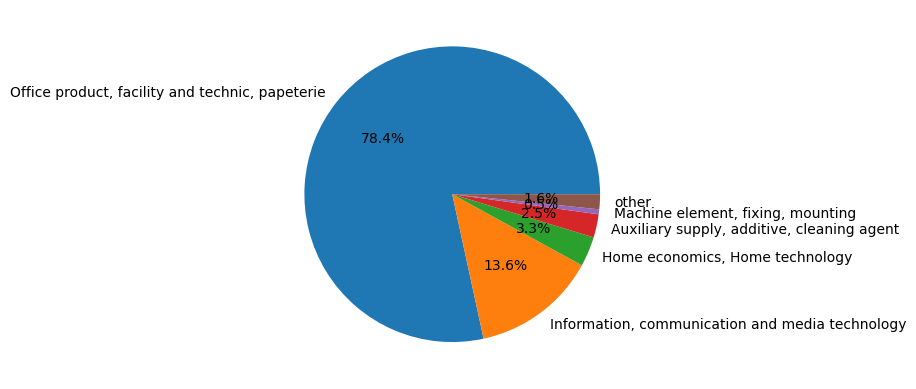

In [25]:
labels = list(merged_dump_76_l1[:5].group_name_layer_1)+ ["other"]
sizes = list(merged_dump_76_l1[:5].count_1) + [sum(list(merged_dump_76_l1[5:].count_1))]
fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct= '%1.1f%%')
# ax.set_title('Products added from July to August, Layer 1', pad=10)

products added to dump 8 from dump 9

([<matplotlib.patches.Wedge at 0x7ff1d8e206d0>,
 [Text(-0.5619451255277025, 0.945630834890474, 'Office product, facility and technic, papeterie'),
  Text(-0.2664409538174978, -1.067243748226628, 'Information, communication and media technology'),
  Text(0.24124212701570547, -1.0732204974528479, 'Home economics, Home technology'),
  Text(0.6403598347567734, -0.8943932479789178, 'Occupational safety, accident prevention'),
  Text(0.8594913503020246, -0.6864944418973854, 'Marketing'),
  Text(0.9475392271648414, -0.5587212301173594, 'Auxiliary supply, additive, cleaning agent'),
  Text(1.002152591921865, -0.4535307955412601, 'Packing material'),
  Text(1.0436504698154623, -0.34755387618895184, 'Food, beverage, tobacco'),
  Text(1.0721451517767377, -0.2459771808961886, 'Machine element, fixing, mounting'),
  Text(1.0901584910031576, -0.1468143878975036, 'Electric engineering, automation, process control engineering'),
  Text(1.0989242227072922, -0.048636948374396485, 'other')],
 [Text(-0.30

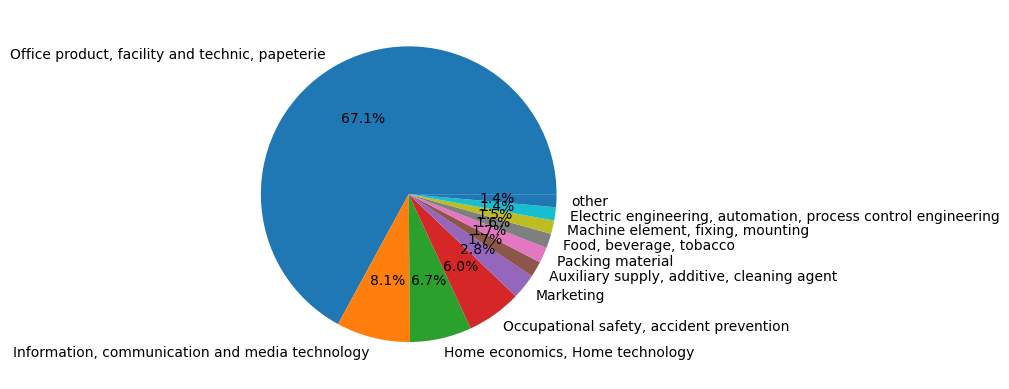

In [26]:
labels = list(merged_dump_98_l1[:10].group_name_layer_1)+ ["other"]
sizes = list(merged_dump_98_l1[:10].count_1) + [sum(list(merged_dump_98_l1[10:].count_1))]
fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct= '%1.1f%%')
# ax.set_title('Products added from July to August, Layer 1', pad=10)

### Checking if the descriptions of the products had changed through time

In [39]:
print(data_1.shape[0], data_2.shape[0], data_3.shape[0], data_4.shape[0], data_5.shape[0], data_6.shape[0], data_7.shape[0], data_8.shape[0], data_9.shape[0], data_10.shape[0])
print(data_1.shape[1], data_2.shape[1], data_3.shape[1], data_4.shape[1], data_5.shape[1], data_6.shape[1], data_7.shape[1], data_8.shape[1], data_9.shape[1], data_10.shape[1])
print()
print(data_1.columns)
print(data_10.columns)

231630 231630 231630 231630 231630 231630 205496 205496 242851 242851
11 11 10 10 10 10 6 6 6 6

Index(['Konzernartikelnummer', 'ECLASS_8_1', 'ECLASS_Name', 'Bezeichnung',
       'Webbezeichnung', 'Detailinformation', 'LieferantenDetailinformation',
       'OEMNummer', 'Hersteller', 'Marke', 'concatenated'],
      dtype='object')
Index(['Konzernartikelnummer', 'ECLASS_8_1', 'ECLASS_Name', 'Text',
       'Hersteller', 'Marke'],
      dtype='object')


#### between the first and second dump

In [1]:
def check_changed_descriptions(dump_1, dump_2, columns):
    dump_1['concatenated'] =  dump_1[columns].fillna('').astype(str).agg(' '.join, axis=1)

    dump_2['concatenated'] =  dump_2[columns].fillna('').astype(str).agg(' '.join, axis=1)
    
    # check if there are any descriptions that have changed 
    my_list = []
    my_list = dump_1['concatenated'] == dump_2['concatenated']
    print("there are " + str(my_list.sum()) + " number of values which have changed.")
    # yes, some descriptions have changed 

    # get the indices for the products with changed descriptions
    changed_desc_index = []
    for i in range(len(my_list)):
        if my_list[i] == False:
            changed_desc_index.append(i)


    # changed_desc_index
    # check if the description length has increased
    # len(data_1.iloc[changed_desc_index[0]]['concatenated']), len(data_2.iloc[changed_desc_index[0]]['concatenated'])
    # print(data_1.iloc[changed_desc_index[0]]['concatenated'])
    # print()
    # print(data_2.iloc[changed_desc_index[0]]['concatenated'])

    # print()
    # len(data_1.iloc[changed_desc_index[1]]['concatenated']), len(data_2.iloc[changed_desc_index[1]]['concatenated'])
    # print(data_1.iloc[changed_desc_index[1]]['concatenated'])
    # print()
    # print(data_2.iloc[changed_desc_index[1]]['concatenated'])
    shortened_desc = []
    extended_desc = []
    same_length = []
    for index in changed_desc_index:
        if len(dump_1.iloc[changed_desc_index[1]]['concatenated']) > len(dump_2.iloc[changed_desc_index[1]]['concatenated']):
            shortened_desc.append(index)
        elif len(dump_1.iloc[changed_desc_index[1]]['concatenated']) < len(dump_2.iloc[changed_desc_index[1]]['concatenated']):
            extended_desc.append(index)
        else: 
            same_length.append(index)
        
    print("Number of all changed product descriptions: "+ str(len(changed_desc_index)))
    print("Number of products with their descriptions shortened: " + str(len(shortened_desc)))
    print("Number of products with their descriptions lengthened: " + str(len(extended_desc)))
    print("Number of products with same length descriptions : " + str(len(same_length)))
    
    # result: the difference is in removal of some code ("_x000D_") which has cleaned the data. This has happened for all the changed descriptions.
    print()

group1_columns = ['ECLASS_8_1', 'ECLASS_Name', 'Bezeichnung',
       'Webbezeichnung', 'Detailinformation', 'LieferantenDetailinformation',
       'OEMNummer', 'Hersteller', 'Marke']

group2_columns = ['Konzernartikelnummer', 'ECLASS_8_1', 'ECLASS_Name', 'Text',
       'Hersteller', 'Marke']
check_changed_descriptions(data_1, data_2, group1_columns)
check_changed_descriptions(data_2, data_3, group1_columns)
check_changed_descriptions(data_3, data_4, group1_columns)
check_changed_descriptions(data_4, data_5, group1_columns)
check_changed_descriptions(data_5, data_6, group1_columns)

# there's a difference between the number of columns between the dumps 6 and 7, therefore, their descriptions must be different. 
# unless the columns are concatenated into one
# todo: check if the new column is a concatenation of the other 4

check_changed_descriptions(data_7, data_8, group2_columns)
check_changed_descriptions(data_8, data_9, group2_columns)
check_changed_descriptions(data_9, data_10, group2_columns)

NameError: name 'data_1' is not defined

### Check which product category has changed the most

In [ ]:
data_1_set = set(df_list[0].Konzernartikelnummer.unique())
data_2_set = set(df_list[1].Konzernartikelnummer.unique())
data_3_set = set(df_list[2].Konzernartikelnummer.unique())
data_4_set = set(df_list[3].Konzernartikelnummer.unique())
data_5_set = set(df_list[4].Konzernartikelnummer.unique())
data_6_set = set(df_list[5].Konzernartikelnummer.unique())
data_7_set = set(df_list[6].Konzernartikelnummer.unique())
data_8_set = set(df_list[7].Konzernartikelnummer.unique())
data_9_set = set(df_list[8].Konzernartikelnummer.unique())
data_10_set = set(df_list[9].Konzernartikelnummer.unique())

### Word embedding on data dumps 
to check if the products removed were of the same cluster. 


Before dump_6, the description was in different columns.

In [11]:
data_6['concatenated'] =  data_6[['Bezeichnung', 'Webbezeichnung', 'Detailinformation']].fillna('').agg(' '.join, axis=1)
data_6['concatenated'] = data_6['concatenated'].apply(lambda x: x.strip())

In [5]:
paraphrase_mpnet_st_model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

In [7]:
@jit(target_backend='cuda')
def encode_data(data, dump_num, path):
    if dump_num < 7: # the dumps after 7 (in May) have their descriptions named in one column as "Text"
        embedded = data['concatenated'].progress_apply(paraphrase_mpnet_st_model.encode)
    else: 
        embedded = data['Text'].progress_apply(paraphrase_mpnet_st_model.encode)
    np.save(path, embedded)
    return embedded

# data_9 had a 
# embedded_df_paraph_mpnet6 = encode_data(data_6, 6, 'calculated_files/mpnet_dumps_6.npy')
# embedded_df_paraph_mpnet7 = encode_data(data_7, 7, 'calculated_files/mpnet_dumps_7.npy')
# embedded_df_paraph_mpnet8 = encode_data(data_8, 8, 'calculated_files/mpnet_dumps_8.npy')
data_9['Text'] = data_9['Text'].fillna('')
embedded_df_paraph_mpnet9 = encode_data(data_9, 9, 'calculated_files/mpnet_dumps_9.npy')


# embedded_df_distil_v1 = np.load('calculated_files/mpnet_dumps_6.npy', allow_pickle=True)

/tmp/ipykernel_72/1826760811.py:1: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "encode_data" failed type inference due to: Untyped global name 'paraphrase_mpnet_st_model': Cannot determine Numba type of <class 'sentence_transformers.SentenceTransformer.SentenceTransformer'>

File "../../tmp/ipykernel_72/1826760811.py", line 4:
<source missing, REPL/exec in use?>

  @jit(target_backend='cuda')
/opt/conda/lib/python3.9/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "encode_data" was compiled in object mode without forceobj=True.

File "../../tmp/ipykernel_72/1826760811.py", line 1:
<source missing, REPL/exec in use?>

  warnings.warn(errors.NumbaWarning(warn_msg,
/opt/conda/lib/python3.9/site-packages/numba/core/object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more inf

100%|██████████| 242851/242851 [36:07<00:00, 112.07it/s]


In [ ]:
embedded_df_paraph_mpnet7 = data_7['Text'].progress_apply(paraphrase_mpnet_st_model.encode)
np.save('calculated_files/mpnet_dumps_7.npy', embedded_df_paraph_mpnet7)
# embedded_df_distil_v1 = np.load('calculated_files/mpnet_dumps_7.npy', allow_pickle=True)

In [ ]:
embedded_df_paraph_mpnet8 = data_8['Text'].progress_apply(paraphrase_mpnet_st_model.encode)
# np.save('calculated_files/mpnet_dumps_8.npy', embedded_df_paraph_mpnet8)
embedded_df_distil_v1 = np.load('calculated_files/mpnet_dumps_8.npy', allow_pickle=True)

In [ ]:
embedded_df_paraph_mpnet9 = data_9['Text'].progress_apply(paraphrase_mpnet_st_model.encode)
np.save('calculated_files/mpnet_dumps_9.npy', embedded_df_paraph_mpnet9)
# embedded_df_distil_v1 = np.load('calculated_files/mpnet_dumps_9.npy', allow_pickle=True)

In [ ]:
embedded_df_paraph_mpnet6 = np.load('calculated_files/mpnet_dumps_6.npy', allow_pickle=True)
embedded_df_paraph_mpnet7 = np.load('calculated_files/mpnet_dumps_7.npy', allow_pickle=True)
embedded_df_paraph_mpnet8 = np.load('calculated_files/mpnet_dumps_8.npy', allow_pickle=True)
embedded_df_paraph_mpnet9 = np.load('calculated_files/mpnet_dumps_9.npy', allow_pickle=True)

In [10]:
sc_X = StandardScaler() 
X_train6 = sc_X.fit_transform(list(embedded_df_paraph_mpnet6))
X_train7 = sc_X.fit_transform(list(embedded_df_paraph_mpnet7))
X_train8 = sc_X.fit_transform(list(embedded_df_paraph_mpnet8))
X_train9 = sc_X.fit_transform(list(embedded_df_paraph_mpnet9))

kmeans_kwargs = {
    "init":'k-means++',
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
} 

def apply_we(data, X_train):
    
    sse_scaled =[]
    homogeneity_measures_df = pd.DataFrame(columns=['layer_4'])
    homogeneity_measures = []
    for k in range(1, 150, 5):
        print('\rProgress: %d' % k, end='')
        sys.stdout.flush()
        kmeans = MiniBatchKMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(X_train)
        sse_scaled.append(kmeans.inertia_)

        homogeneity_measures.append(homogeneity_score(data['ECLASS_8_1'], kmeans.labels_))

        homogeneity_measures_df.loc[len(homogeneity_measures_df)] = homogeneity_measures

        homogeneity_measures = []
    
    return homogeneity_measures_df, sse_scaled

res6, sse6 = apply_we(data_6, X_train6)
res7, sse7= apply_we(data_7, X_train7)
res8, sse8 = apply_we(data_8, X_train8)
res9, sse9 = apply_we(data_9, X_train9)



Progress: 146

In [6]:
# res6.to_csv('calculated_files/evaluation_metric_dfs/res6.csv', index=False)
# res7.to_csv('calculated_files/evaluation_metric_dfs/res7.csv', index=False)
# res8.to_csv('calculated_files/evaluation_metric_dfs/res8.csv', index=False)
# res9.to_csv('calculated_files/evaluation_metric_dfs/res9.csv', index=False)

res6 = pd.read_csv('calculated_files/evaluation_metric_dfs/res6.csv')
res7 = pd.read_csv('calculated_files/evaluation_metric_dfs/res7.csv')
res8 = pd.read_csv('calculated_files/evaluation_metric_dfs/res8.csv')
res9 = pd.read_csv('calculated_files/evaluation_metric_dfs/res9.csv')


In [15]:
res6.shape

(30, 1)

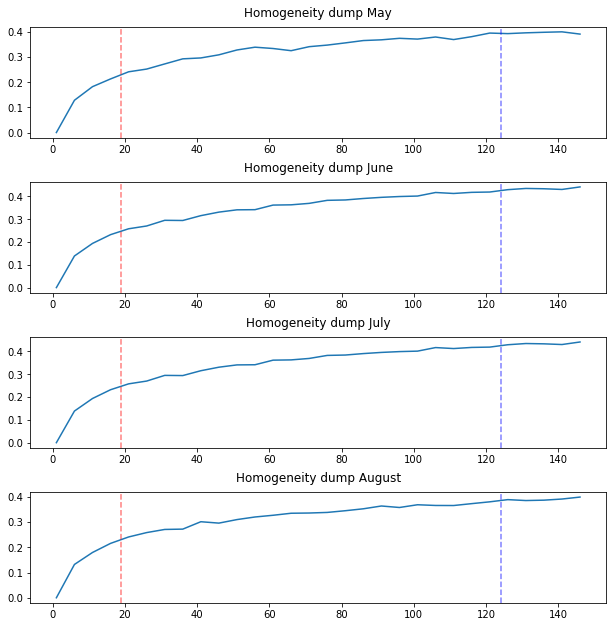

In [11]:
fig, axs =  plt.subplots(4, 1, figsize=(10, 10)) # 3 * 9
ax = axs[0]
ax.plot(range(1, 150, 5), res6)
ax.set_title('Homogeneity dump May', pad=10)

ax = axs[1]
ax.plot(range(1, 150, 5), res7)
ax.set_title('Homogeneity dump June', pad=10)

ax = axs[2]
ax.plot(range(1, 150, 5), res8)
ax.set_title('Homogeneity dump July', pad=10)

ax = axs[3]
ax.plot(range(1, 150, 5), res9)
ax.set_title('Homogeneity dump August', pad=10)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

for i in range(4):
    axs[i].axvline(x = 19, color = 'red', linestyle = '--', alpha = 0.5)
    axs[i].axvline(x = 124, color = 'blue', linestyle = '--', alpha = 0.5)


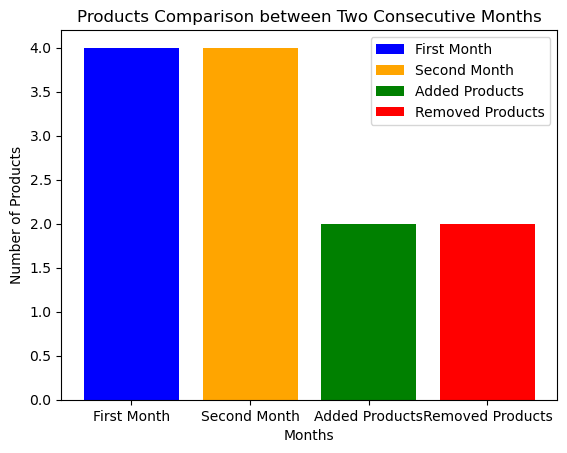

In [2]:
import matplotlib.pyplot as plt

# Sample data for two consecutive months
first_month_products = {'Product1', 'Product2', 'Product3', 'Product4'}
second_month_products = {'Product2', 'Product3', 'Product5', 'Product6'}

# Calculate added and removed products
added_products = second_month_products - first_month_products
removed_products = first_month_products - second_month_products

# Create a bar plot
fig, ax = plt.subplots()

# Plot the total number of products for each month
ax.bar('First Month', len(first_month_products), label='First Month', color='blue')
ax.bar('Second Month', len(second_month_products), label='Second Month', color='orange')

# Plot the added and removed products
ax.bar('Added Products', len(added_products), label='Added Products', color='green')
ax.bar('Removed Products', len(removed_products), label='Removed Products', color='red')

# Add labels and legend
ax.set_xlabel('Months')
ax.set_ylabel('Number of Products')
ax.set_title('Products Comparison between Two Consecutive Months')
ax.legend()

# Display the plot
plt.show()


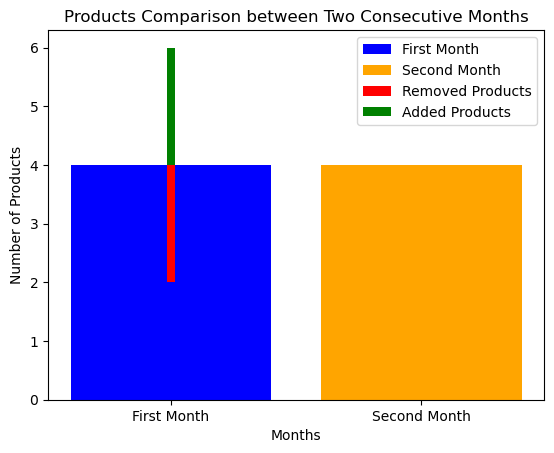

In [23]:
import matplotlib.pyplot as plt

# Sample data for two consecutive months
first_month_products = {'Product1', 'Product2', 'Product3', 'Product4'}
second_month_products = {'Product2', 'Product3', 'Product5', 'Product6'}

# Calculate added and removed products
added_products = second_month_products - first_month_products
removed_products = first_month_products - second_month_products

# Create a bar plot
fig, ax = plt.subplots()

# Plot the total number of products for each month
ax.bar('First Month', len(first_month_products), label='First Month', color='blue')
ax.bar('Second Month', len(second_month_products), label='Second Month', color='orange')

# Plot the added and removed products on the same bars
ax.bar('First Month', len(removed_products), bottom=len(first_month_products)-len(removed_products), label='Removed Products', color='red', width=0.03)
ax.bar('First Month', len(added_products), bottom=len(first_month_products), label='Added Products', color='green', width=0.03)

# Add labels and legend
ax.set_xlabel('Months')
ax.set_ylabel('Number of Products')
ax.set_title('Products Comparison between Two Consecutive Months')
ax.legend()

# Display the plot
plt.show()
